# One-hot untuk kata

In [1]:
import numpy as np

samples = ['Kucing itu duduk di atas tikar.', 'Anjing memakan PR saya.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

print("Token Index:", token_index)
print("One-Hot Encoded Tensor Shape:", results.shape)
print("One-Hot Encoded Tensor (Sample 0):\n", results[0])


Token Index: {'Kucing': 1, 'itu': 2, 'duduk': 3, 'di': 4, 'atas': 5, 'tikar.': 6, 'Anjing': 7, 'memakan': 8, 'PR': 9, 'saya.': 10}
One-Hot Encoded Tensor Shape: (2, 10, 11)
One-Hot Encoded Tensor (Sample 0):
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# One-hot untuk karakter

In [2]:
import string 

samples = ['Kucing itu duduk di atas tikar.', 'Anjing memakan PR saya.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        if j >= max_length:
            break
        index = list(token_index.keys())[list(token_index.values()).index(character)] if character in token_index.values() else 0
        results[i, j, index] = 1

print("Token Index Sample:", dict(list(token_index.items())[:10]))
print("One-Hot Encoded Tensor Shape:", results.shape)
print("One-Hot Encoded Tensor (Sample 0):\n", results[0])

Token Index Sample: {1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9'}
One-Hot Encoded Tensor Shape: (2, 50, 101)
One-Hot Encoded Tensor (Sample 0):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# One-hot dengan PyTorch

In [4]:
import torch

samples = ['kucing duduk duduk di atas tikar', 'anjing lari mengejar bola']
token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index)

vocab_size = len(token_index)
max_length = 3

results = torch.zeros((len(samples), max_length, vocab_size), dtype=torch.float32)

for i, sample in enumerate(samples):
    for j, word in enumerate(sample.split()[:max_length]):
        index = token_index[word]
        results[i, j, index] = 1.

print("Token Index:", token_index)
print("One-Hot Tensor Shape:", results.shape)
print("Encoded Tensor (Sample 0):\n", results[0])


Token Index: {'kucing': 0, 'duduk': 1, 'di': 2, 'atas': 3, 'tikar': 4, 'anjing': 5, 'lari': 6, 'mengejar': 7, 'bola': 8}
One-Hot Tensor Shape: torch.Size([2, 3, 9])
Encoded Tensor (Sample 0):
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.]])


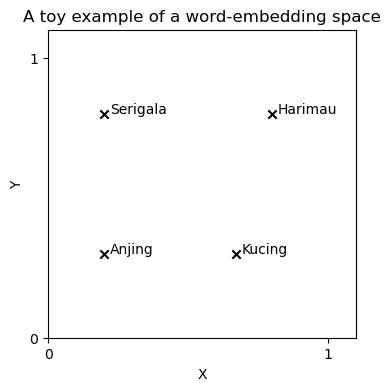

In [11]:
import matplotlib.pyplot as plt

# Koordinat untuk setiap kata
word_positions = {
    "Anjing": (0.2, 0.3),
    "Serigala": (0.2, 0.8),
    "Kucing": (0.67, 0.3),
    "Harimau": (0.8, 0.8)
}

# Membuat plot
plt.figure(figsize=(4, 4))
for word, (x, y) in word_positions.items():
    plt.scatter(x, y, marker='x', color='black')
    plt.text(x + 0.02, y, word, fontsize=10)

# Setting sumbu
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("A toy example of a word-embedding space")
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("embedding_space.png", dpi=300)
plt.show()

# membangun embedding layer

In [18]:
import torch
import torch.nn as nn
from datasets import load_dataset
from collections import defaultdict
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import re


In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text.split()

def encode(text):
    tokens = clean_text(text)
    return torch.tensor([word2idx.get(token, word2idx["<unk>"]) for token in tokens], dtype=torch.long)

def collate_batch(batch):
    texts = [encode(item["text"]) for item in batch]
    labels = torch.tensor([1 if item["label"] == 1 else 0 for item in batch], dtype=torch.float32)
    padded = pad_sequence(texts, batch_first=True, padding_value=word2idx["<pad>"])
    return padded, labels

In [20]:
dataset = load_dataset("imdb", split="train[:1%]")  # hanya ambil 1% untuk cepat

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [21]:
token_freq = defaultdict(int)
for item in dataset:
    for word in clean_text(item["text"]):
        token_freq[word] += 1

vocab_size = 10000
sorted_tokens = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:vocab_size-2]
word2idx = {"<pad>": 0, "<unk>": 1}
for i, (word, _) in enumerate(sorted_tokens, start=2):
    word2idx[word] = i


In [22]:

dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=collate_batch)

embedding_dim = 64
embedding_layer = nn.Embedding(vocab_size, embedding_dim, padding_idx=word2idx["<pad>"])


In [23]:

for x_batch, y_batch in dataloader:
    embedded = embedding_layer(x_batch)
    print("Input shape:", x_batch.shape)
    print("Embedded shape:", embedded.shape)
    print("Embedded example:\n", embedded[0])
    break

Input shape: torch.Size([4, 861])
Embedded shape: torch.Size([4, 861, 64])
Embedded example:
 tensor([[-0.8764, -0.3231,  0.8998,  ...,  0.3514, -0.6742, -1.1679],
        [ 0.7030,  0.3475,  0.9381,  ...,  1.4341, -0.1672,  1.1425],
        [-0.2905, -0.4065,  0.1671,  ...,  0.8774,  0.1030, -0.9028],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<SelectBackward0>)
